In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [7]:
csv = pd.read_csv('/Users/jonniebarnsley/Downloads/L-curves - C(6).csv')
csv

,name,aC,aPhi,misfit,gradC,gradPhi,X0,X1
0,run09,0.01,1.000000e+08,2.580000e+15,6.230000e+14,5415.250,2.090000e+11,8.770000e+10
1,run17,0.10,1.000000e+08,2.525360e+15,5.360000e+14,4843.400,1.790000e+11,7.760000e+10
2,run08,1.00,1.000000e+08,2.530000e+15,2.800000e+14,6267.830,3.360000e+11,1.020000e+11
3,run15,5.00,1.000000e+08,3.140000e+15,1.440000e+14,5783.800,5.650000e+11,9.500000e+10
4,run14,10.00,1.000000e+08,2.720000e+15,1.190000e+14,3021.100,6.430000e+11,7.290000e+10
5,run16,50.00,1.000000e+08,3.080000e+15,3.400000e+13,5237.210,2.140000e+12,1.190000e+11
6,run04,100.00,1.000000e+08,3.300000e+15,3.010000e+13,3975.660,2.600000e+12,9.270000e+10
7,run11,1.00,1.000000e+06,2.480000e+15,3.070000e+14,5372.740,2.580000e+11,8.390000e+10
8,run08,1.00,1.000000e+08,2.530000e+15,2.800000e+14,6267.830,3.360000e+11,1.020000e+11
9,run22,1.00,1.000000e+09,2.430000e+15,2.880000e+14,5290.000,2.930000e+11,9.030000e+10


Text(0, 0.5, 'solution norm')

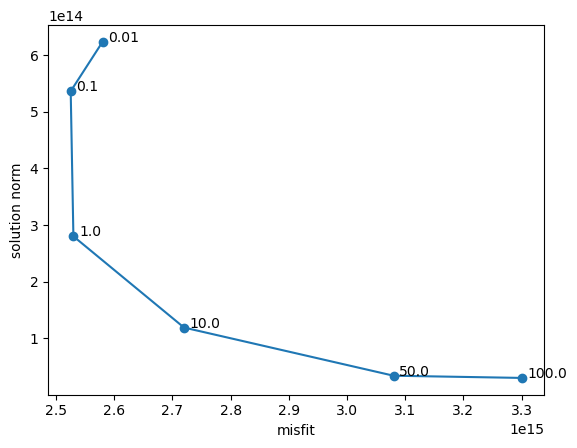

In [8]:
Cruns = csv[:7]
Cruns = Cruns.drop(3)
plt.plot(Cruns['misfit'], Cruns['gradC'])
plt.scatter(Cruns['misfit'], Cruns['gradC'])

for i, label in zip(Cruns.index, Cruns['aC']):
    x = Cruns['misfit'][i] + 1e13
    y = Cruns['gradC'][i]
    plt.text(x, y, label)

plt.xlabel('misfit')
plt.ylabel('solution norm')

#plt.yscale('log')
#plt.xscale('log')
#plt.xlim(Cruns['misfit'].min(), Cruns['misfit'].max())

Text(0, 0.5, 'solution norm')

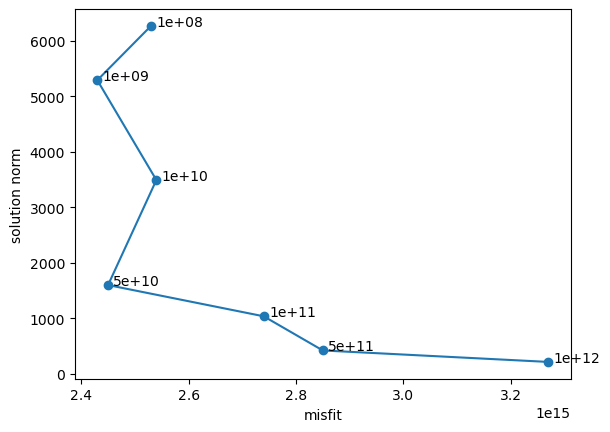

In [10]:
Phiruns = csv[7:]
Phiruns = Phiruns.drop(7)

fig, ax = plt.subplots()

ax.plot(Phiruns['misfit'], Phiruns['gradPhi'])
ax.scatter(Phiruns['misfit'], Phiruns['gradPhi'])

for i, label in zip(Phiruns.index, Phiruns['aPhi']):
    x = Phiruns['misfit'][i] + 1e13
    y = Phiruns['gradPhi'][i]
    ax.text(x, y, f'{label:.0e}')

ax.set_xlabel('misfit')
ax.set_ylabel('solution norm')
#ax.set_yscale('log')

In [6]:
Phiruns

,name,aC,aPhi,misfit,gradC,gradPhi,X0,X1
8,run08,1.0,1.000000e+08,2.530000e+15,2.800000e+14,6267.830,3.360000e+11,1.020000e+11
9,run02,1.0,1.000000e+10,2.540000e+15,2.870000e+14,3491.920,3.040000e+11,8.850000e+10
10,run20,1.0,5.000000e+10,2.450000e+15,2.910000e+14,1599.990,2.910000e+11,8.010000e+10
11,run19,1.0,1.000000e+11,2.740000e+15,3.330000e+14,1037.410,2.190000e+11,6.670000e+10
12,run21,1.0,5.000000e+11,2.850000e+15,3.040000e+14,422.405,2.940000e+11,7.430000e+10
13,run13,1.0,1.000000e+12,3.270000e+15,3.470000e+14,215.670,2.110000e+11,5.660000e+10


In [7]:
import re
with open('/Users/jonniebarnsley/Downloads/outer.txt') as f:
    outer = f.read()

misfit = list(map(float, re.findall(r"\|\|\s*velocity misfit\s*\|\|\^2\s*=\s*([\d\.e+-]+)", outer)))
gradC = list(map(float, re.findall(r"\|\|\s*grad C\s*\|\|\^2\s*=\s*([\d\.e+-]+)", outer)))
gradPhi = list(map(float, re.findall(r"\|\|\s*grad muCoef\s*\|\|\^2\s*=\s*([\d\.e+-]+)", outer)))

Text(0.5, 1.0, 'L-curve ($C$)')

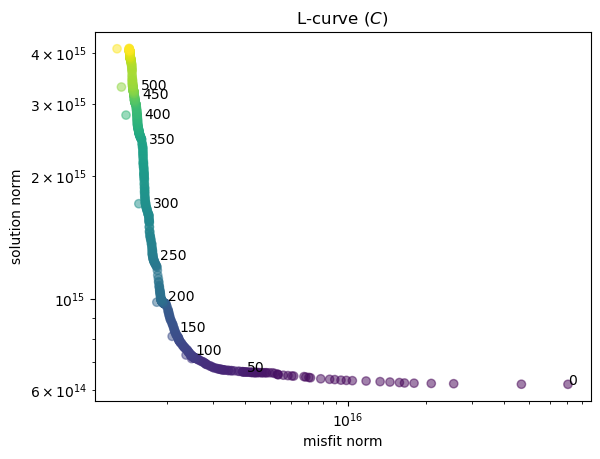

In [75]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(misfit, gradC, c=range(len(misfit)), cmap='viridis', alpha=0.5)
plt.xscale('log')
plt.yscale('log')

for iter in np.arange(0, 550, 50):
    x = misfit[iter]
    y = gradC[iter]
    plt.text(x+1e14, y, str(iter))

plt.xlabel('misfit norm')
plt.ylabel('solution norm')
plt.title('L-curve ($C$)')

Text(0.5, 1.0, 'L-curve ($\\Phi$)')

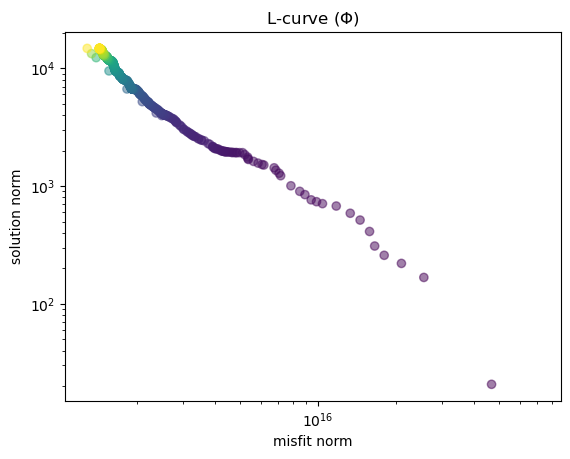

In [79]:
plt.scatter(misfit, gradPhi, c=range(len(misfit)), cmap='viridis', alpha=0.5)
plt.xscale('log')
plt.yscale('log')

# for iter in np.arange(0, 550, 50):
#     x = misfit[iter]
#     y = gradPhi[iter]
#     plt.text(x, y, str(iter))

plt.xlabel('misfit norm')
plt.ylabel('solution norm')
plt.title('L-curve ($\Phi$)')

In [3]:
optC = pd.read_csv('/Users/jonniebarnsley/Downloads/L_curves.csv')
optC

,Unnamed: 0,name,aC,aPhi,iter,misfit,gradC,gradPhi,gradX0,gradX1
0,0,inv01,0.01,1.000000e+10,500,2.451240e+15,4.905820e+14,0,218017.0,0
1,1,inv02,0.05,1.000000e+10,500,2.448140e+15,3.099180e+14,0,243357.0,0
2,2,inv03,0.10,1.000000e+10,500,2.437080e+15,2.218760e+14,0,266308.0,0
3,3,inv04,0.50,1.000000e+10,500,2.439160e+15,8.281190e+13,0,437987.0,0
4,4,inv05,1.00,1.000000e+10,500,2.454280e+15,5.588520e+13,0,476321.0,0
5,5,inv06,5.00,1.000000e+10,500,2.616400e+15,2.787770e+13,0,790960.0,0
6,6,inv07,10.00,1.000000e+10,500,2.511960e+15,1.003280e+13,0,841315.0,0
7,7,inv08,50.00,1.000000e+10,491,2.700790e+15,6.070090e+12,0,1444210.0,0
8,8,inv09,100.00,1.000000e+10,470,2.871140e+15,4.233400e+12,0,3264550.0,0


Text(0.5, 1.0, 'L-curve ($C$), $n=3$')

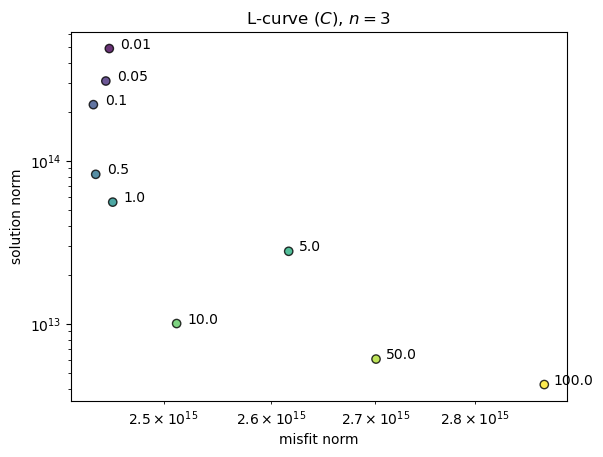

In [14]:
plt.scatter(optC['misfit'], optC['gradC'], c=range(len(optC)), cmap='viridis', alpha=0.8, edgecolors='k')
for i, row in optC.iterrows():
    plt.text(row['misfit']+1e13, row['gradC'], str(row['aC']))

plt.xlabel('misfit norm')
plt.ylabel('solution norm')

plt.xscale('log')
plt.yscale('log')

plt.title('L-curve ($C$), $n=3$')

Text(0.5, 1.0, 'L-curve ($\\Phi$), $n=3$')

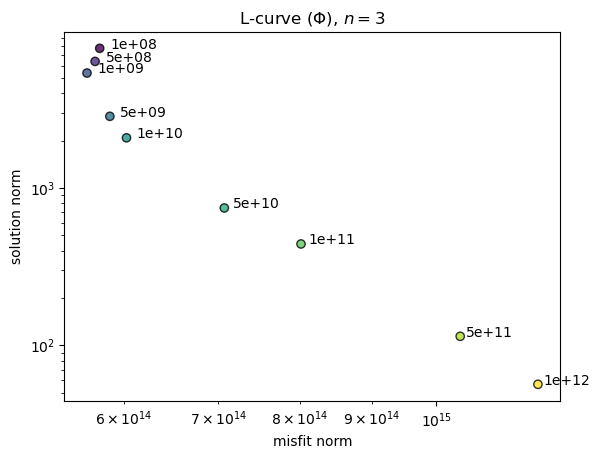

In [15]:
optPhi = pd.read_csv('/Users/jonniebarnsley/Downloads/results_optPhi.csv')
plt.scatter(optPhi['misfit'], optPhi['gradPhi'], c=range(len(optPhi)), cmap='viridis', alpha=0.8, edgecolors='k')
for i, row in optPhi.iterrows():

    plt.text(row['misfit']+1e13, row['gradPhi'], f"{row['aPhi']:.0e}")

plt.xlabel('misfit norm')
plt.ylabel('solution norm')

plt.xscale('log')
plt.yscale('log')

plt.title('L-curve ($\Phi$), $n=3$')

Text(0.5, 1.0, 'L-curve ($C$), $n=2$')

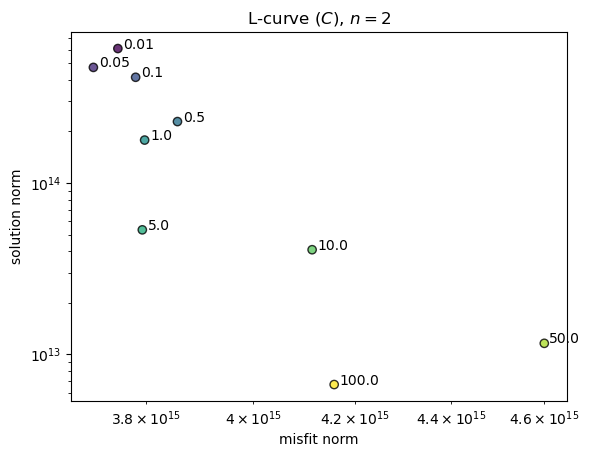

In [17]:
glens2_optC = pd.read_csv('/Users/jonniebarnsley/Downloads/results_glens2_optC.csv')
plt.scatter(glens2_optC['misfit'], glens2_optC['gradC'], c=range(len(glens2_optC)), cmap='viridis', alpha=0.8, edgecolors='k')
for i, row in glens2_optC.iterrows():
    plt.text(row['misfit']+1e13, row['gradC'], str(row['aC']))

plt.xlabel('misfit norm')
plt.ylabel('solution norm')

plt.xscale('log')
plt.yscale('log')

plt.title('L-curve ($C$), $n=2$')

Text(0.5, 1.0, 'L-curve ($C$), $n=4$')

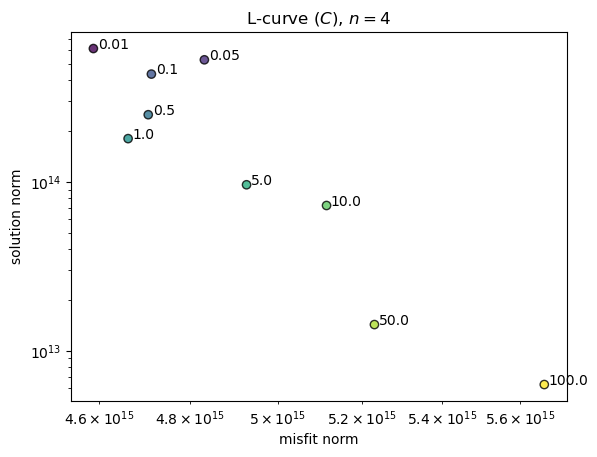

In [5]:
glens4_optC = pd.read_csv('/Users/jonniebarnsley/Downloads/results_glens4_optC.csv')
plt.scatter(glens4_optC['misfit'], glens4_optC['gradC'], c=range(len(glens4_optC)), cmap='viridis', alpha=0.8, edgecolors='k')
for i, row in glens4_optC.iterrows():
    plt.text(row['misfit']+1e13, row['gradC'], str(row['aC']))

plt.xlabel('misfit norm')
plt.ylabel('solution norm')

plt.xscale('log')
plt.yscale('log')

plt.title('L-curve ($C$), $n=4$')